by Yaroslava Lochman

In [112]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style("darkgrid")
mpl.rcParams['image.cmap'] = 'viridis'

from sklearn.linear_model import LinearRegression
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
df = pd.read_csv('GLB.Ts+dSST.csv', header=1)
df.DJF = df.DJF.map(lambda x: None if x == '***'else float(x))
df['D-N'] = df['D-N'].map(lambda x: None if x == '***'else float(x))
df['median'] = df.loc[:, 'Jan':'Dec'].median(1)
df['mean'] = df.loc[:, 'Jan':'Dec'].mean(1)
df['min'] = df.loc[:, 'Jan':'Dec'].min(1)
df['max'] = df.loc[:, 'Jan':'Dec'].max(1)
df.head()
# J-D: Jan -- Dec
# D-N: Dec -- Nov
# DJF: Winter
# MAM: Spring
# JJA: Summer
# SON: Autumn

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,J-D,D-N,DJF,MAM,JJA,SON,median,mean,min,max
0,1880,-0.29,-0.18,-0.11,-0.19,-0.11,-0.23,-0.21,-0.09,-0.16,...,-0.19,NaN,NaN,-0.14,-0.18,-0.20,-0.195,-0.185833,-0.29,-0.09
1,1881,-0.15,-0.17,0.04,0.04,0.02,-0.20,-0.06,-0.02,-0.13,...,-0.10,-0.11,-0.18,0.03,-0.09,-0.18,-0.115,-0.095000,-0.21,0.04
2,1882,0.15,0.15,0.04,-0.18,-0.16,-0.26,-0.20,-0.05,-0.10,...,-0.10,-0.09,0.06,-0.10,-0.17,-0.17,-0.160,-0.104167,-0.26,0.15
3,1883,-0.31,-0.39,-0.13,-0.17,-0.20,-0.12,-0.08,-0.15,-0.20,...,-0.19,-0.20,-0.31,-0.16,-0.12,-0.19,-0.165,-0.189167,-0.39,-0.08
4,1884,-0.15,-0.08,-0.37,-0.42,-0.36,-0.40,-0.34,-0.26,-0.27,...,-0.29,-0.28,-0.13,-0.39,-0.34,-0.27,-0.290,-0.289167,-0.42,-0.08


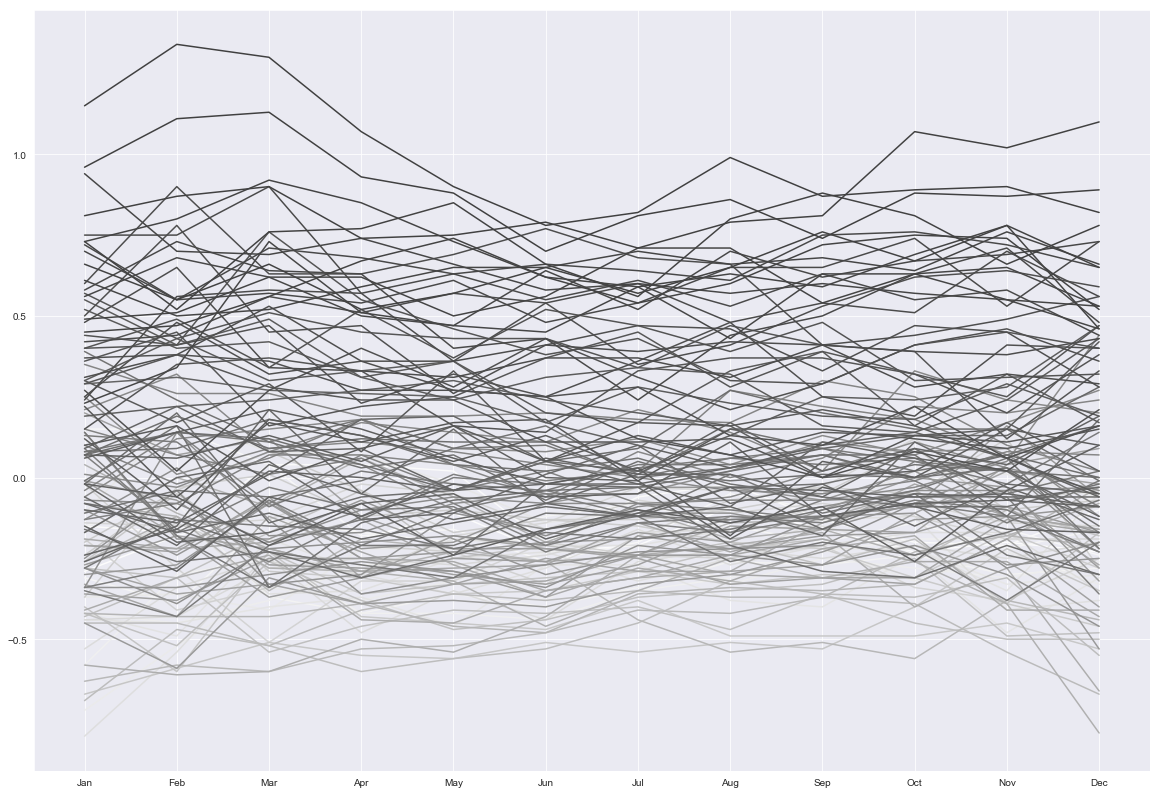

In [196]:
c = 0.99
for i in range(len(df)):
    plt.plot(df.loc[i,'Jan':'Dec'], color=[c**(i+1)]*3)

In [5]:
# mpl.rcParams['figure.figsize'] = (20,15)
# sns.heatmap(np.array(df.loc[:,'Jan':'Dec']).T, cmap='coolwarm')
# plt.show()

In [ ]:
months = df.loc[:,'Jan':'Dec'].columns
seasons = df.loc[:,'DJF':'SON'].columns
colors = ['C0', 'C2', 'C1', 'C3']

# var 

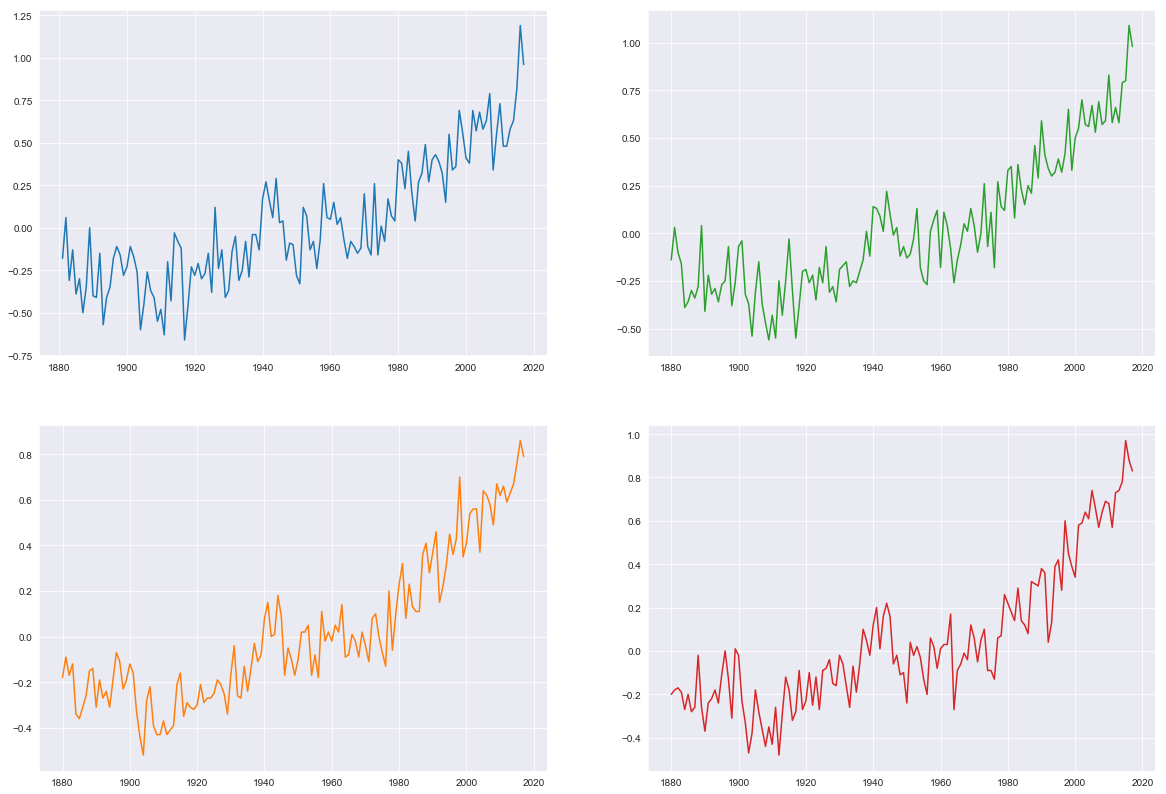

In [94]:
for i, season in enumerate(seasons):
    plt.subplot(2,2,i+1)
    plt.plot(df.Year, df[season], colors[i])
# plt.legend(regions_code, loc=1)
# plt.yticks([])
plt.show()
# plt.plot(df.Year, df['J-D'])

# var

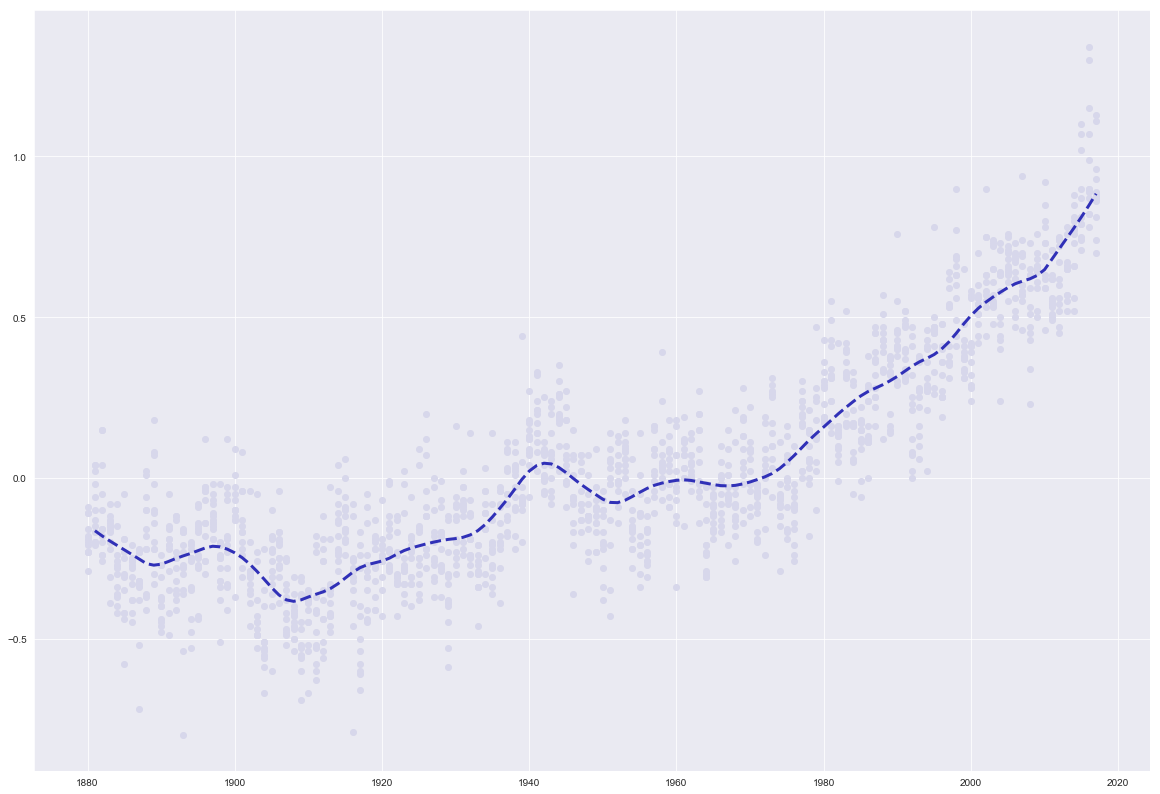

In [90]:
from statsmodels.nonparametric.smoothers_lowess import lowess
mpl.rcParams['figure.figsize'] = (20,14)
for i, month in enumerate(months):
    plt.scatter(df.Year, df[month], color='#d7d7eb')
t = np.arange(1,len(df.Year)+1)[1:]
y = np.array(df['J-D'][1:])
frac = 0.12
trend = lowess(y, t, frac=frac, missing='drop', return_sorted=False)
plt.plot(df.Year[1:], trend, color='#3030b7', linestyle='--', linewidth=3)

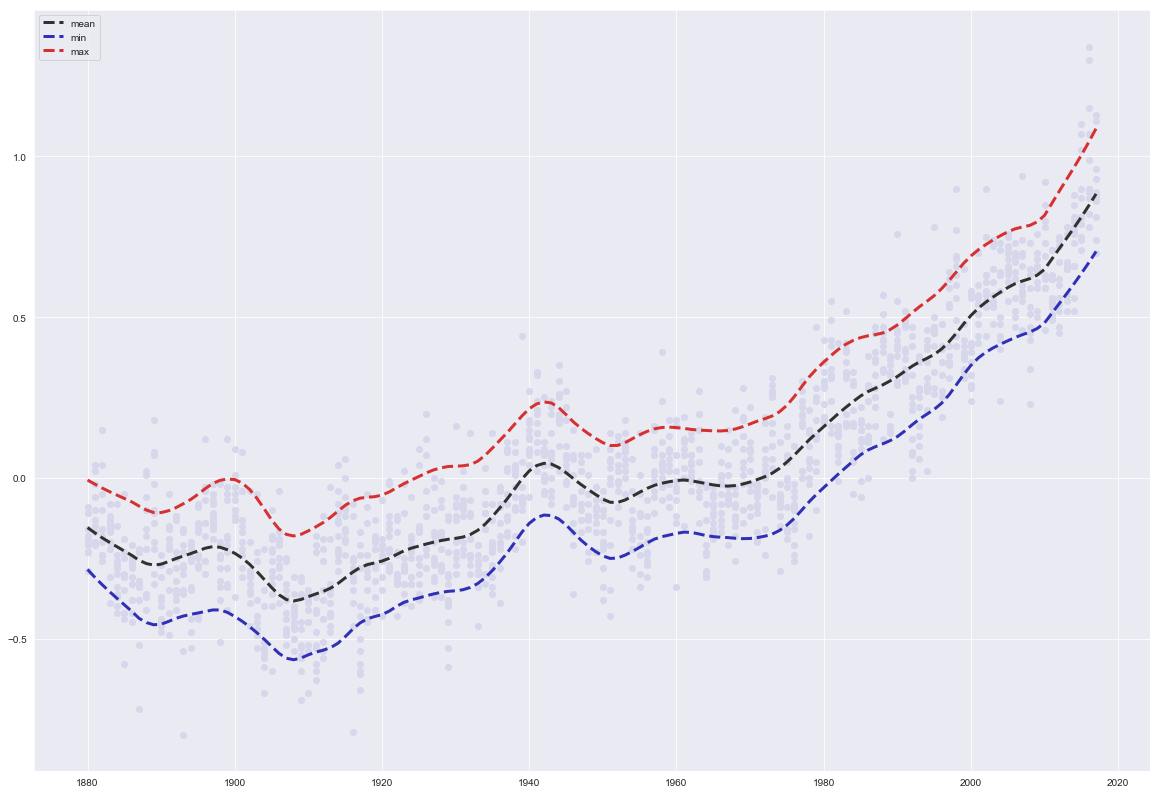

In [139]:
from statsmodels.nonparametric.smoothers_lowess import lowess
mpl.rcParams['figure.figsize'] = (20,14)
for i, month in enumerate(months):
    plt.scatter(df.Year, df[month], color='#d7d7eb')
chs = ['mean', 'min', 'max']
colors = ['#303030', '#3030b7', '#d73030']
for i, ch in enumerate(chs):
    t = np.arange(1,len(df.Year)+1)
    y = np.array(df[ch])
    frac = 0.12
    trend = lowess(y, t, frac=frac, missing='drop', return_sorted=False)
    plt.plot(df.Year, trend, color=colors[i], linestyle='--', linewidth=3)
plt.legend(chs)
plt.show()

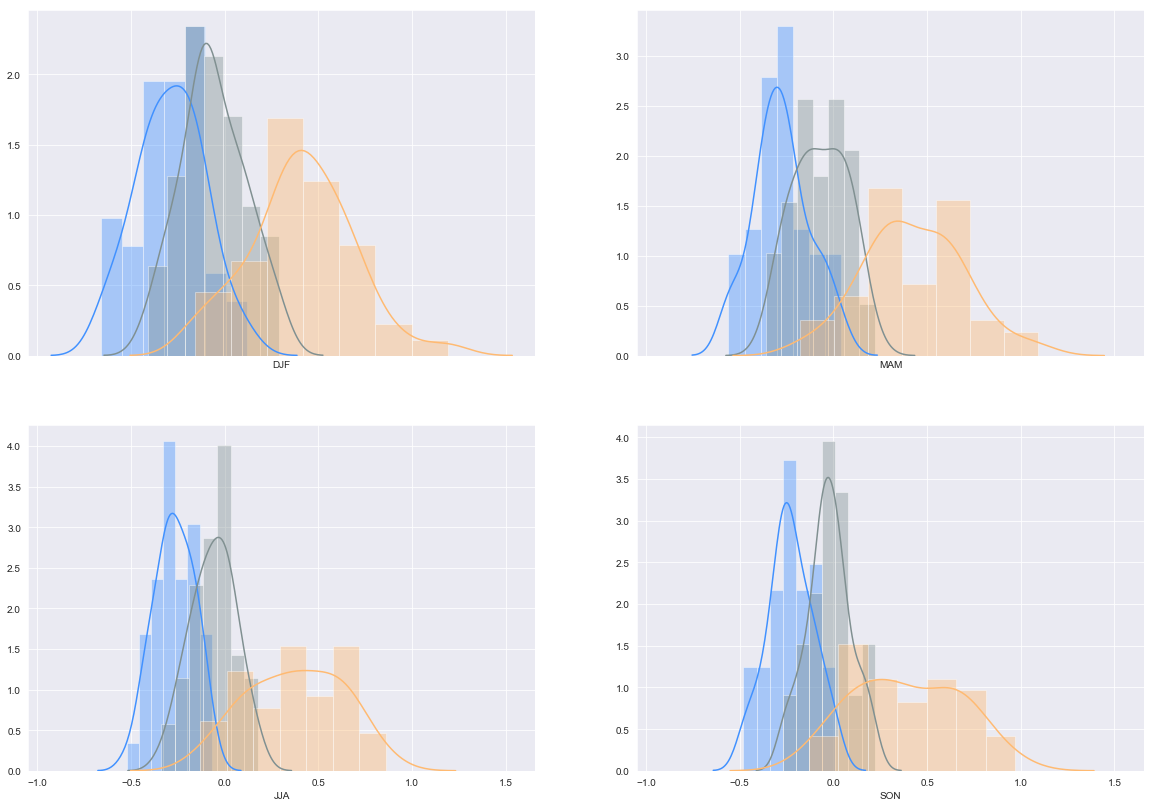

In [175]:
f, ax = plt.subplots(2, 2, sharex=True)
for i, season in enumerate(seasons):
#     plt.subplot(2,2,i+1)
    sns.distplot(df.loc[1:46, season], bins='sqrt', color='#4191FF', ax=ax.flatten()[i])
    sns.distplot(df.loc[46:92, season], bins='sqrt', color='#809091', ax=ax.flatten()[i])
    sns.distplot(df.loc[92:, season], bins='sqrt', color='#FFBA72', ax=ax.flatten()[i])
plt.show()

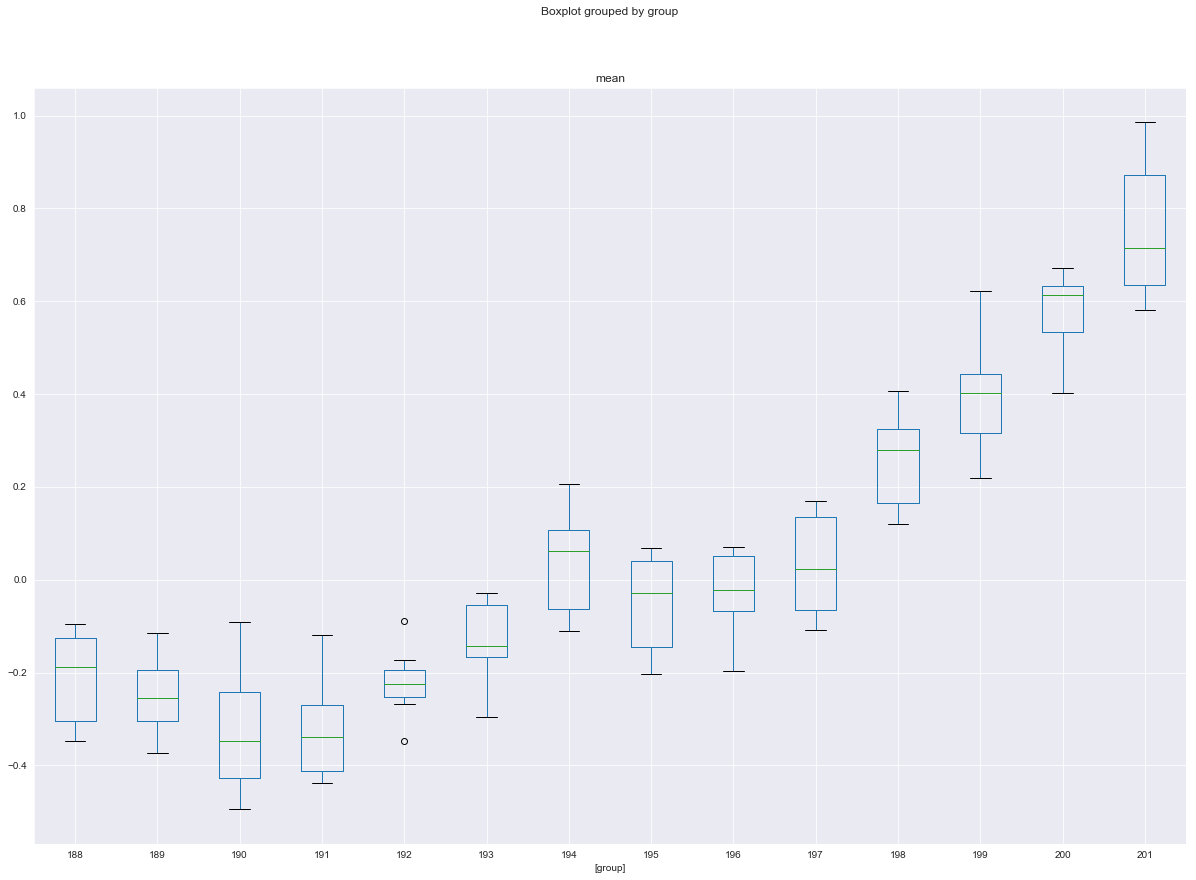

In [197]:
df['group'] = df.Year // 10
df[['group', 'mean']].boxplot(by='group')

# var

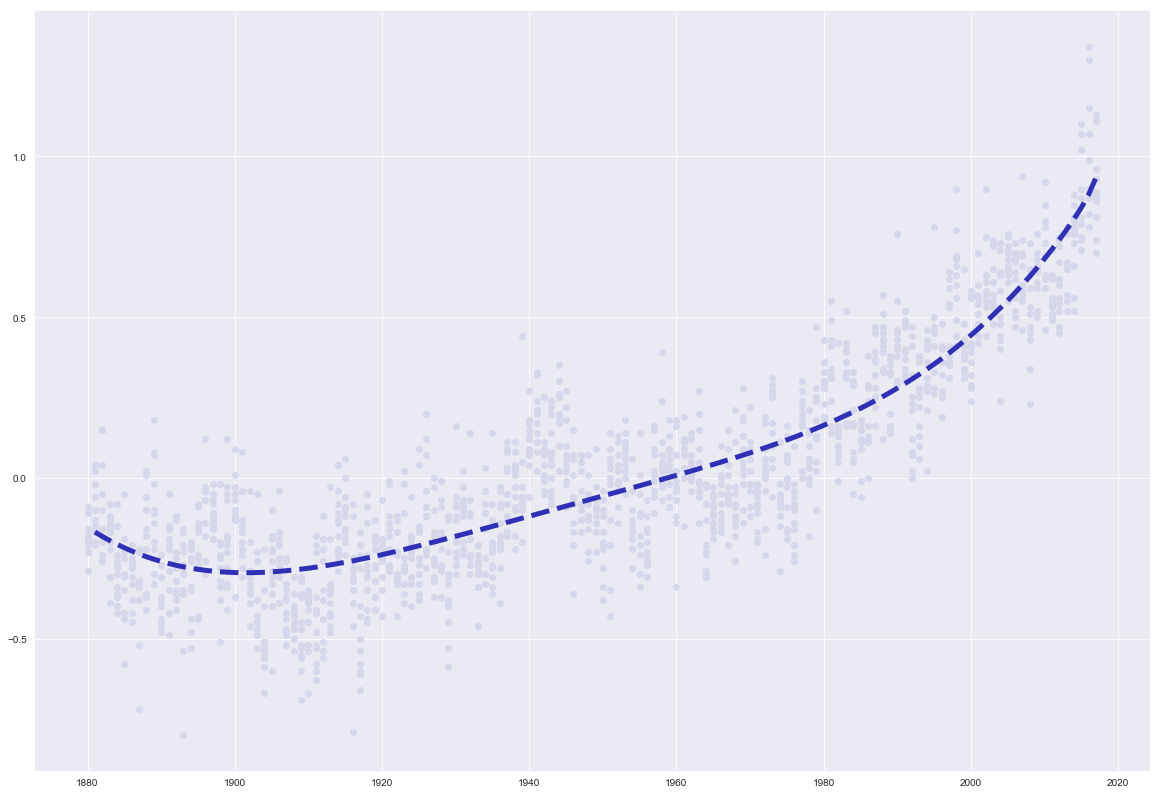

In [71]:
mpl.rcParams['figure.figsize'] = (20,14)
for i, month in enumerate(months):
    plt.scatter(df.Year, df[month], color='#d7d7eb')
t = np.arange(1,len(df.Year)+1)
X = np.vstack((t, t**2, t**3, t**4, np.exp(t))).T[1:]
y = np.array(df['J-D'][1:])
y_pred = LinearRegression(normalize=True).fit(X, y).predict(X)
plt.plot(df.Year[1:], y_pred, color='#3030b7', linestyle='--', linewidth=5)

In [16]:
# for i, season in enumerate(seasons):
#     plt.scatter(df.Year, df[season], color='gray')
    
#     t = np.arange(1,len(df.Year)+1)
#     X = np.vstack((t, t**2, np.exp(t))).T[1:]
#     y = np.array(df[season][1:])
#     y_pred = LinearRegression(normalize=True).fit(X, y).predict(X)
#     plt.plot(df.Year[1:], y_pred, color=colors[i], linewidth=5)

In [14]:
# mpl.rcParams['figure.figsize'] = (20,15)

# months_colors = ['C0']*2 + ['C2']*3+['C1']*3+['C3']*3+['C0']
# for i, month in enumerate(months):
#     if i in range(2,5):
#         plt.scatter(df.Year, df[month], color=months_colors[i])